In [64]:
import torch
import torch.nn as nn
from torchvision import transforms as T
from torch.optim import Adam
from Vit_utils import Patches ,PositionalEncoding,TransformerEncoder,preprocess_data
from tqdm import tqdm
import numpy as np

In [65]:
class VisionTransformer(nn.Module):
    def __init__(self, d_model, n_classes, img_size, patch_size, n_channels, n_heads, n_layers):
        super().__init__()

        assert img_size[0] % patch_size[0] == 0 and img_size[1] % patch_size[1] == 0, "img_size dimensions must be divisible by patch_size dimensions"
        assert d_model % n_heads == 0, "d_model must be divisible by n_heads"

        self.d_model = d_model  # Dimensionality of model 
        self.n_classes = n_classes  # Number of classes 
        self.img_size = img_size  # Image size 
        self.patch_size = patch_size  # Patch size 
        self.n_channels = n_channels  # Number of channels 
        self.n_heads = n_heads  # Number of attention heads

        self.n_patches = (self.img_size[0] // self.patch_size[0]) * (self.img_size[1] // self.patch_size[1])
        print(f"patch size {self.n_patches}")
        self.seq_length = self.n_patches

        self.patch_embedding = Patches(self.d_model, self.img_size, self.patch_size, self.n_channels)
        self.positional_encoding = PositionalEncoding(self.d_model, self.seq_length)
        self.transformer_encoder = nn.Sequential(*[TransformerEncoder(self.d_model, self.n_heads) for _ in range(n_layers)])

        # Classification MLP
        self.classification = nn.Sequential(
            nn.Linear(self.d_model, self.n_classes),
            nn.Softmax(dim=-1)
        )

    def forward(self, images):
        x = self.patch_embedding(images)
        x = self.positional_encoding(x)
        x = self.transformer_encoder(x)
        x = self.classification(x[:, 0])  # Use the class token
        return x


In [66]:
DATASET_PATH = "/home/bhavit/Desktop/VIT-transformer/Rice_Image_Dataset"
train_loader ,test_loader, class_names ,num_classes = preprocess_data(DATASET_PATH)


Classes: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
Number of classes: 5


In [67]:
d_model = 9
n_classes = 5
img_size = (32,32)
patch_size = (16,16)
n_channels = 3
n_heads = 3
n_layers = 3
batch_size = 128
epochs = 5
lr = 0.003


In [68]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"DEVICE {device}")

DEVICE cuda


In [69]:
train_losses = []
transformer = VisionTransformer(d_model, n_classes, img_size, patch_size, n_channels, n_heads, n_layers).to(device)
optimizer = torch.optim.Adam(transformer.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
EPOCH = 50

for epoch in range(EPOCH):
    train_loss = 0.0

    # Training
    transformer.train()
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCH} - Training"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = transformer(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader) 
    train_losses.append(train_loss)

    print(f'Epoch {epoch + 1}/{EPOCH} loss: {train_loss:.3f}')




patch size 4


Epoch 1/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 152.06it/s]


Epoch 1/50 loss: 1.023


Epoch 2/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 155.97it/s]


Epoch 2/50 loss: 0.978


Epoch 3/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 160.44it/s]


Epoch 3/50 loss: 0.977


Epoch 4/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 152.90it/s]


Epoch 4/50 loss: 0.979


Epoch 5/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 158.64it/s]


Epoch 5/50 loss: 0.976


Epoch 6/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 158.44it/s]


Epoch 6/50 loss: 0.975


Epoch 7/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 156.66it/s]


Epoch 7/50 loss: 0.978


Epoch 8/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 154.72it/s]


Epoch 8/50 loss: 0.975


Epoch 9/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 156.80it/s]


Epoch 9/50 loss: 0.977


Epoch 10/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 162.10it/s]


Epoch 10/50 loss: 0.979


Epoch 11/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 156.51it/s]


Epoch 11/50 loss: 0.975


Epoch 12/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 161.77it/s]


Epoch 12/50 loss: 0.979


Epoch 13/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 163.67it/s]


Epoch 13/50 loss: 0.978


Epoch 14/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 158.59it/s]


Epoch 14/50 loss: 0.974


Epoch 15/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 157.30it/s]


Epoch 15/50 loss: 0.979


Epoch 16/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 159.18it/s]


Epoch 16/50 loss: 0.976


Epoch 17/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 154.80it/s]


Epoch 17/50 loss: 0.977


Epoch 18/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 154.75it/s]


Epoch 18/50 loss: 0.972


Epoch 19/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 155.58it/s]


Epoch 19/50 loss: 0.957


Epoch 20/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 159.39it/s]


Epoch 20/50 loss: 0.952


Epoch 21/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 154.62it/s]


Epoch 21/50 loss: 0.949


Epoch 22/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 152.89it/s]


Epoch 22/50 loss: 0.945


Epoch 23/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 153.78it/s]


Epoch 23/50 loss: 0.949


Epoch 24/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 157.28it/s]


Epoch 24/50 loss: 0.952


Epoch 25/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 155.55it/s]


Epoch 25/50 loss: 0.950


Epoch 26/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 157.25it/s]


Epoch 26/50 loss: 0.946


Epoch 27/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 157.93it/s]


Epoch 27/50 loss: 0.949


Epoch 28/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 156.99it/s]


Epoch 28/50 loss: 0.947


Epoch 29/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 155.19it/s]


Epoch 29/50 loss: 0.946


Epoch 30/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 152.88it/s]


Epoch 30/50 loss: 0.951


Epoch 31/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 159.55it/s]


Epoch 31/50 loss: 0.950


Epoch 32/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 155.10it/s]


Epoch 32/50 loss: 0.950


Epoch 33/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 150.89it/s]


Epoch 33/50 loss: 0.952


Epoch 34/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 155.35it/s]


Epoch 34/50 loss: 0.946


Epoch 35/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 160.85it/s]


Epoch 35/50 loss: 0.951


Epoch 36/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 153.06it/s]


Epoch 36/50 loss: 0.953


Epoch 37/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 159.05it/s]


Epoch 37/50 loss: 0.956


Epoch 38/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 153.92it/s]


Epoch 38/50 loss: 0.958


Epoch 39/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 153.75it/s]


Epoch 39/50 loss: 0.953


Epoch 40/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 156.45it/s]


Epoch 40/50 loss: 0.946


Epoch 41/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 159.74it/s]


Epoch 41/50 loss: 0.951


Epoch 42/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 152.87it/s]


Epoch 42/50 loss: 0.951


Epoch 43/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 155.99it/s]


Epoch 43/50 loss: 0.956


Epoch 44/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 160.97it/s]


Epoch 44/50 loss: 0.952


Epoch 45/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 157.38it/s]


Epoch 45/50 loss: 0.949


Epoch 46/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 158.97it/s]


Epoch 46/50 loss: 0.958


Epoch 47/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 155.24it/s]


Epoch 47/50 loss: 0.951


Epoch 48/50 - Training: 100%|██████████| 1875/1875 [00:12<00:00, 153.26it/s]


Epoch 48/50 loss: 0.952


Epoch 49/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 159.03it/s]


Epoch 49/50 loss: 0.956


Epoch 50/50 - Training: 100%|██████████| 1875/1875 [00:11<00:00, 160.32it/s]

Epoch 50/50 loss: 0.954


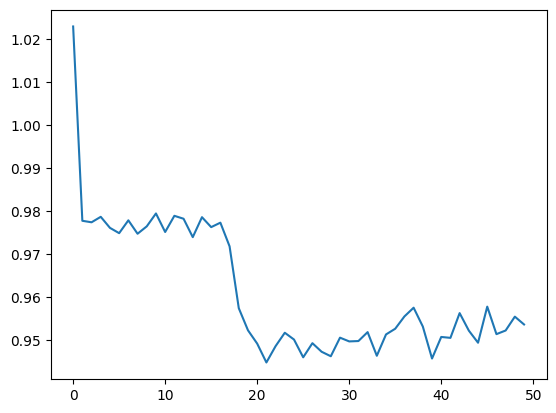

In [70]:
import matplotlib.pyplot as plt

plt.plot(train_losses)
plt.show()